In [1]:
import pandas as pd
import pycountry
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from pathlib import Path
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ProgbarLogger
from sklearn.decomposition import PCA

In [2]:
dfolder = 'data/'

In [3]:
df = pd.read_csv(dfolder + 'merged.csv')

/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_42039/446111836.py:1: DtypeWarning: Columns (64) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dfolder + 'merged.csv')


In [4]:
df

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,192001,ABW,1,1920,2.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,192001,AFG,1,1920,1050.0,364.0,224.0,1462.0,510.0,118.0,...,20.0,28.0,290.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,192001,AGO,1,1920,86.0,42.0,26.0,126.0,62.0,14.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,192001,AIA,1,1920,6.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,192001,ALB,1,1920,28.0,36.0,8.0,44.0,20.0,4.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,202305,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116299,202305,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116300,202305,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116301,202305,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,192001,ABW,1,1920,2.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,192001,AFG,1,1920,1050.0,364.0,224.0,1462.0,510.0,118.0,...,20.0,28.0,290.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,192001,AGO,1,1920,86.0,42.0,26.0,126.0,62.0,14.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,192001,AIA,1,1920,6.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,192001,ALB,1,1920,28.0,36.0,8.0,44.0,20.0,4.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,202305,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116299,202305,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116300,202305,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116301,202305,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df[df['year'] >= 1989]

In [7]:
df

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
23666,198901,AFG,1,1989,462.0,256.0,338.0,2024.0,264.0,88.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
23667,198901,AGO,1,1989,110.0,72.0,152.0,430.0,242.0,24.0,...,0.0,0.0,4.0,0.0,Angola,249.0,249.0,0.0,0.0,0.0
23668,198901,ALB,1,1989,64.0,44.0,116.0,192.0,18.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
23669,198901,ARE,1,1989,10.0,10.0,16.0,24.0,2.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
23670,198901,ARG,1,1989,146.0,36.0,10.0,200.0,58.0,18.0,...,0.0,2.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,202305,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116299,202305,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116300,202305,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116301,202305,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['MonthYear', 'isocode', 'month', 'year', 'count_events_1',
       'count_events_2', 'count_events_3', 'count_events_4', 'count_events_5',
       'count_events_6', 'count_events_7', 'count_events_8', 'count_events_9',
       'count_events_10', 'count_events_11', 'count_events_12',
       'count_events_13', 'count_events_14', 'count_events_15',
       'count_events_16', 'count_events_17', 'count_events_18',
       'count_events_19', 'count_events_20', 'count_events_1_gov',
       'count_events_2_gov', 'count_events_3_gov', 'count_events_4_gov',
       'count_events_5_gov', 'count_events_6_gov', 'count_events_7_gov',
       'count_events_8_gov', 'count_events_9_gov', 'count_events_10_gov',
       'count_events_11_gov', 'count_events_12_gov', 'count_events_13_gov',
       'count_events_14_gov', 'count_events_15_gov', 'count_events_16_gov',
       'count_events_17_gov', 'count_events_18_gov', 'count_events_19_gov',
       'count_events_20_gov', 'count_events_1_opp', 'count_events_2_o

In [9]:
cols = ['country', 'deaths', 'state_deaths', 'nonstate_deaths', 'onesided_deaths', 'civilian_deaths']
for col in cols:
    pct_missing = df[col].isnull().sum() * 100 / len(df)
    print(f'{col}: {pct_missing}%')


country: 85.76270820514482%
deaths: 85.76270820514482%
state_deaths: 85.76270820514482%
nonstate_deaths: 85.76270820514482%
onesided_deaths: 85.76270820514482%
civilian_deaths: 85.76270820514482%


In [10]:
df_no_nan_country = df[df['country'].notna()]
df_no_nan_country

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
23666,198901,AFG,1,1989,462.0,256.0,338.0,2024.0,264.0,88.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
23667,198901,AGO,1,1989,110.0,72.0,152.0,430.0,242.0,24.0,...,0.0,0.0,4.0,0.0,Angola,249.0,249.0,0.0,0.0,0.0
23705,198901,COL,1,1989,54.0,30.0,44.0,180.0,42.0,4.0,...,0.0,14.0,4.0,0.0,Colombia,9.0,9.0,0.0,0.0,0.0
23722,198901,ETH,1,1989,36.0,52.0,74.0,254.0,76.0,12.0,...,0.0,4.0,2.0,0.0,Ethiopia,2716.0,2716.0,0.0,0.0,0.0
23728,198901,GBR,1,1989,1030.0,350.0,444.0,1522.0,360.0,94.0,...,6.0,0.0,0.0,0.0,United Kingdom,3.0,2.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115802,202303,THA,3,2023,2554.0,1570.0,1626.0,6782.0,1834.0,700.0,...,32.0,2.0,34.0,0.0,Thailand,2.0,2.0,0.0,0.0,0.0
115810,202303,TUR,3,2023,5276.0,2946.0,4304.0,14786.0,5360.0,1374.0,...,32.0,18.0,38.0,0.0,Turkey,1.0,1.0,0.0,0.0,0.0
115814,202303,UGA,3,2023,2102.0,1256.0,1160.0,3526.0,1514.0,380.0,...,14.0,8.0,30.0,0.0,Uganda,1.0,0.0,0.0,1.0,1.0
115815,202303,UKR,3,2023,25644.0,12548.0,14472.0,49040.0,16670.0,5434.0,...,112.0,42.0,124.0,0.0,Ukraine,829.0,829.0,0.0,0.0,170.0


In [11]:
df

,MonthYear,isocode,month,year,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
23666,198901,AFG,1,1989,462.0,256.0,338.0,2024.0,264.0,88.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
23667,198901,AGO,1,1989,110.0,72.0,152.0,430.0,242.0,24.0,...,0.0,0.0,4.0,0.0,Angola,249.0,249.0,0.0,0.0,0.0
23668,198901,ALB,1,1989,64.0,44.0,116.0,192.0,18.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
23669,198901,ARE,1,1989,10.0,10.0,16.0,24.0,2.0,2.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
23670,198901,ARG,1,1989,146.0,36.0,10.0,200.0,58.0,18.0,...,0.0,2.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116298,202305,XKX,5,2023,60.0,50.0,58.0,200.0,124.0,2.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116299,202305,YEM,5,2023,276.0,156.0,182.0,1364.0,362.0,38.0,...,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116300,202305,ZAF,5,2023,6568.0,2976.0,2874.0,10818.0,3262.0,1188.0,...,6.0,2.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
116301,202305,ZMB,5,2023,386.0,264.0,176.0,724.0,374.0,48.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df['nonstate_deaths'].fillna(0, inplace=True)
df['onesided_deaths'].fillna(0, inplace=True)
df['civilian_deaths'].fillna(0, inplace=True)
df['deaths'].fillna(0, inplace=True)
df['state_deaths'].fillna(0, inplace=True)


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_42039/1456559570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nonstate_deaths'].fillna(0, inplace=True)
/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_42039/1456559570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['onesided_deaths'].fillna(0, inplace=True)
/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_42039/1456559570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [13]:
df.MonthYear.dtype
df.year.dtype
df.month.dtype

dtype('int64')

In [14]:
# dataFrame with all possible MonthYear for each isocode
all_dates = pd.date_range(start='1989-01-01', end='2023-04-01', freq='M')
all_isocodes = df['isocode'].unique()

# each isocode with a full range of dates
dfs = [pd.DataFrame(data={'MonthYear': (all_dates.year*100 + all_dates.month).astype(int), 
                          'year': all_dates.year, 
                          'month': all_dates.month, 
                          'isocode': iso}) for iso in all_isocodes]

# concatenation
full_df = pd.concat(dfs)

# merge
merged_df = pd.merge(full_df, df, on=['MonthYear', 'isocode', 'month', 'year'], how='left')

# fill missing values 
merged_df.fillna(0, inplace=True)


In [15]:
def get_country_name(iso_code):
    try:
        return pycountry.countries.get(alpha_3=iso_code).name
    except AttributeError:
        return None

merged_df['country'] = merged_df['isocode'].apply(get_country_name)

In [16]:
merged_df

,MonthYear,year,month,isocode,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,198901,1989,1,AFG,462.0,256.0,338.0,2024.0,264.0,88.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
1,198902,1989,2,AFG,916.0,516.0,630.0,2228.0,680.0,276.0,...,20.0,20.0,172.0,0.0,Afghanistan,86.0,86.0,0.0,0.0,23.0
2,198903,1989,3,AFG,546.0,274.0,206.0,1148.0,370.0,104.0,...,16.0,28.0,218.0,0.0,Afghanistan,1720.0,1720.0,0.0,0.0,96.0
3,198904,1989,4,AFG,364.0,262.0,182.0,976.0,290.0,68.0,...,10.0,40.0,258.0,0.0,Afghanistan,494.0,494.0,0.0,0.0,86.0
4,198905,1989,5,AFG,312.0,150.0,156.0,706.0,190.0,20.0,...,0.0,16.0,80.0,0.0,Afghanistan,454.0,448.0,6.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98635,202211,2022,11,HMD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Heard Island and McDonald Islands,0.0,0.0,0.0,0.0,0.0
98636,202212,2022,12,HMD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Heard Island and McDonald Islands,0.0,0.0,0.0,0.0,0.0
98637,202301,2023,1,HMD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Heard Island and McDonald Islands,0.0,0.0,0.0,0.0,0.0
98638,202302,2023,2,HMD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,Heard Island and McDonald Islands,0.0,0.0,0.0,0.0,0.0


Every country isocode has the correct number of months in MonthYear. No months are missing.
For every country, the months are in ascending order, meaning the data for each isocode is ordered correctly by time.


In [17]:
# Check for any missing months
num_months = len(pd.date_range(start='1989-01-01', end='2023-04-01', freq='M'))
month_counts = merged_df.groupby('isocode')['MonthYear'].nunique()
assert month_counts.min() == num_months, "Some countries have missing months"

# Check if months are in ascending order
is_monotonic = merged_df.groupby('isocode')['MonthYear'].apply(lambda x: x.is_monotonic_increasing)
assert is_monotonic.all(), "Some countries have months not in ascending order"


In [18]:
num_months

411

In [19]:
is_monotonic

isocode
ABW    True
AFG    True
AGO    True
AIA    True
ALB    True
       ... 
XKX    True
YEM    True
ZAF    True
ZMB    True
ZWE    True
Name: MonthYear, Length: 240, dtype: bool

In [20]:
df = merged_df

In [21]:
df.describe()

,MonthYear,year,month,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,count_events_7,...,count_events_16_opp,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
count,98640.000000,98640.000000,98640.000000,98640.000000,98640.000000,98640.000000,9.864000e+04,98640.000000,98640.000000,98640.000000,...,98640.000000,98640.000000,98640.000000,98640.000000,98640.000000,98640.000000,98640.000000,98640.000000,98640.000000,98640.000000
mean,200569.240876,2005.627737,6.467153,2061.783212,1036.090328,1056.731610,3.635279e+03,1148.470884,330.477088,487.539842,...,2.324534,12.211131,10.127149,29.686902,0.130677,26.392285,14.381144,3.159925,8.851217,11.036040
std,988.722947,9.887746,3.461416,17051.109226,9201.930825,8336.646559,2.703776e+04,8908.348451,2494.047143,4684.973828,...,13.210119,74.661814,58.200193,172.671933,1.475955,1678.392295,193.052705,57.526111,1662.525887,1664.219859
min,198901.000000,1989.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199707.000000,1997.000000,3.000000,16.000000,8.000000,10.000000,4.200000e+01,10.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,200602.000000,2006.000000,6.000000,158.000000,74.000000,98.000000,3.720000e+02,104.000000,24.000000,28.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,201409.000000,2014.000000,9.000000,756.000000,356.000000,442.000000,1.640000e+03,472.000000,126.000000,154.000000,...,0.000000,4.000000,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,202303.000000,2023.000000,12.000000,634448.000000,345500.000000,311928.000000,1.008004e+06,352824.000000,86990.000000,177042.000000,...,852.000000,6644.000000,2370.000000,8722.000000,204.000000,522125.000000,25512.000000,7513.000000,521530.000000,521620.000000


In [22]:
merged_df.head(10)

,MonthYear,year,month,isocode,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_17_opp,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths
0,198901,1989,1,AFG,462.0,256.0,338.0,2024.0,264.0,88.0,...,0.0,14.0,76.0,0.0,Afghanistan,693.0,693.0,0.0,0.0,0.0
1,198902,1989,2,AFG,916.0,516.0,630.0,2228.0,680.0,276.0,...,20.0,20.0,172.0,0.0,Afghanistan,86.0,86.0,0.0,0.0,23.0
2,198903,1989,3,AFG,546.0,274.0,206.0,1148.0,370.0,104.0,...,16.0,28.0,218.0,0.0,Afghanistan,1720.0,1720.0,0.0,0.0,96.0
3,198904,1989,4,AFG,364.0,262.0,182.0,976.0,290.0,68.0,...,10.0,40.0,258.0,0.0,Afghanistan,494.0,494.0,0.0,0.0,86.0
4,198905,1989,5,AFG,312.0,150.0,156.0,706.0,190.0,20.0,...,0.0,16.0,80.0,0.0,Afghanistan,454.0,448.0,6.0,0.0,28.0
5,198906,1989,6,AFG,222.0,64.0,130.0,782.0,224.0,46.0,...,14.0,8.0,42.0,0.0,Afghanistan,495.0,495.0,0.0,0.0,25.0
6,198907,1989,7,AFG,264.0,158.0,180.0,806.0,204.0,52.0,...,26.0,26.0,120.0,0.0,Afghanistan,620.0,578.0,42.0,0.0,10.0
7,198908,1989,8,AFG,204.0,120.0,122.0,784.0,124.0,30.0,...,8.0,8.0,76.0,0.0,Afghanistan,410.0,225.0,185.0,0.0,1.0
8,198909,1989,9,AFG,198.0,106.0,110.0,564.0,154.0,24.0,...,8.0,18.0,108.0,0.0,Afghanistan,71.0,71.0,0.0,0.0,11.0
9,198910,1989,10,AFG,158.0,124.0,72.0,476.0,134.0,16.0,...,2.0,12.0,48.0,0.0,Afghanistan,239.0,239.0,0.0,0.0,19.0


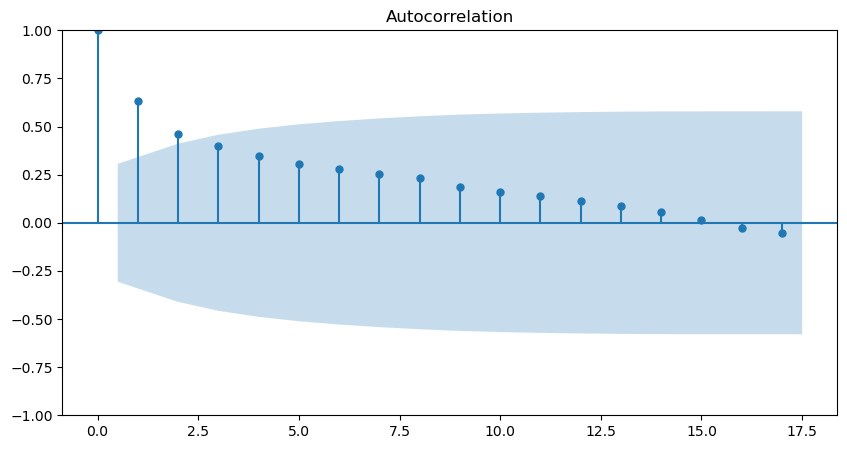

In [23]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Compute the autocorrelation
autocorrelation = sm.tsa.acf(merged_df['state_deaths'], nlags=40)

# Plot the autocorrelation
fig, ax = plt.subplots(figsize=(10, 5))
sm.graphics.tsa.plot_acf(autocorrelation, ax=ax)
plt.show()


In [24]:
merged_df['date'] = pd.to_datetime(merged_df[['year', 'month']].assign(day=1))

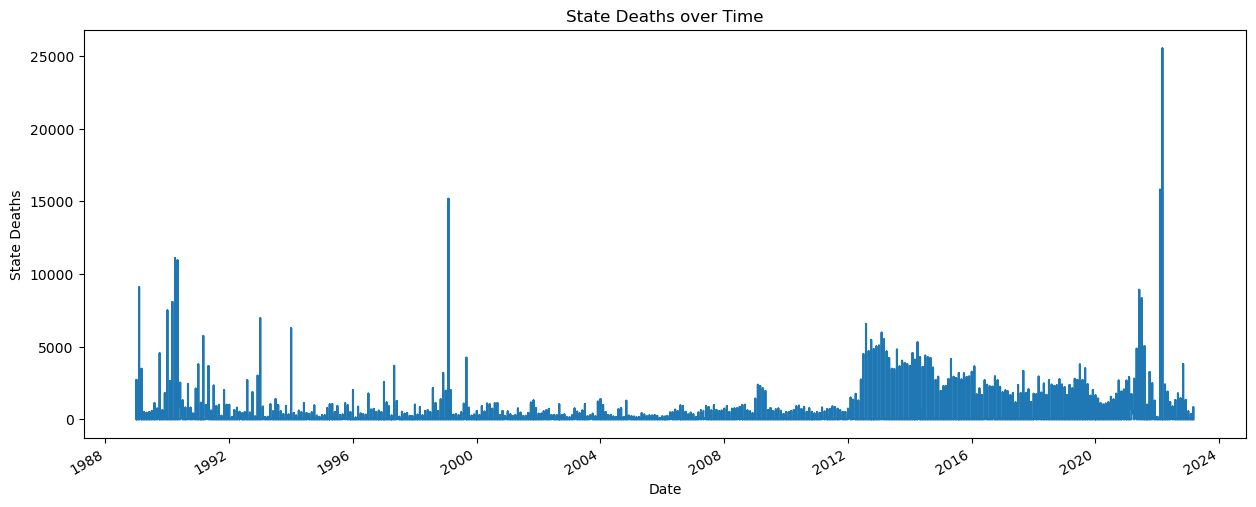

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
merged_df.set_index('date')['state_deaths'].plot()
plt.title('State Deaths over Time')
plt.xlabel('Date')
plt.ylabel('State Deaths')
plt.show()


In [26]:

merged_df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
merged_df.set_index('date', inplace=True)

# list of all countries
countries = merged_df['country'].unique()

# store the lagged features
df_lagged = pd.DataFrame()

# Loop over each country
for country in countries:
    df_country = df[df['country'] == country].copy()
    df_country['deaths_lag'] = df_country['deaths'].shift(1) 
    df_lagged = pd.concat([df_lagged, df_country])

# Drop rows with missing values
df_lagged.dropna(subset=['deaths_lag'], inplace=True)


In [27]:
df_lagged

,MonthYear,year,month,isocode,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths,deaths_lag
date,,,,,,,,,,,,,,,,,,,,,
1989-02-01,198902,1989,2,AFG,916.0,516.0,630.0,2228.0,680.0,276.0,...,20.0,172.0,0.0,Afghanistan,86.0,86.0,0.0,0.0,23.0,693.0
1989-03-01,198903,1989,3,AFG,546.0,274.0,206.0,1148.0,370.0,104.0,...,28.0,218.0,0.0,Afghanistan,1720.0,1720.0,0.0,0.0,96.0,86.0
1989-04-01,198904,1989,4,AFG,364.0,262.0,182.0,976.0,290.0,68.0,...,40.0,258.0,0.0,Afghanistan,494.0,494.0,0.0,0.0,86.0,1720.0
1989-05-01,198905,1989,5,AFG,312.0,150.0,156.0,706.0,190.0,20.0,...,16.0,80.0,0.0,Afghanistan,454.0,448.0,6.0,0.0,28.0,494.0
1989-06-01,198906,1989,6,AFG,222.0,64.0,130.0,782.0,224.0,46.0,...,8.0,42.0,0.0,Afghanistan,495.0,495.0,0.0,0.0,25.0,454.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,202211,2022,11,HMD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Heard Island and McDonald Islands,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-01,202212,2022,12,HMD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Heard Island and McDonald Islands,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01,202301,2023,1,HMD,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Heard Island and McDonald Islands,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df_lagged = df_lagged.sort_values(['year', 'month', 'isocode'])


In [29]:
df_lagged

,MonthYear,year,month,isocode,count_events_1,count_events_2,count_events_3,count_events_4,count_events_5,count_events_6,...,count_events_18_opp,count_events_19_opp,count_events_20_opp,country,deaths,state_deaths,nonstate_deaths,onesided_deaths,civilian_deaths,deaths_lag
date,,,,,,,,,,,,,,,,,,,,,
1989-02-01,198902,1989,2,ABW,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Aruba,0.0,0.0,0.0,0.0,0.0,0.0
1989-02-01,198902,1989,2,AFG,916.0,516.0,630.0,2228.0,680.0,276.0,...,20.0,172.0,0.0,Afghanistan,86.0,86.0,0.0,0.0,23.0,693.0
1989-02-01,198902,1989,2,AGO,80.0,50.0,92.0,286.0,126.0,20.0,...,0.0,14.0,0.0,Angola,331.0,331.0,0.0,0.0,0.0,249.0
1989-02-01,198902,1989,2,AIA,4.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,Anguilla,0.0,0.0,0.0,0.0,0.0,0.0
1989-02-01,198902,1989,2,ALB,78.0,52.0,46.0,242.0,114.0,30.0,...,0.0,0.0,0.0,Albania,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,202303,2023,3,WSM,160.0,118.0,148.0,418.0,170.0,28.0,...,0.0,0.0,0.0,Samoa,0.0,0.0,0.0,0.0,0.0,0.0
2023-03-01,202303,2023,3,YEM,1332.0,502.0,648.0,1924.0,1150.0,152.0,...,6.0,42.0,0.0,Yemen,104.0,96.0,8.0,0.0,34.0,0.0
2023-03-01,202303,2023,3,ZAF,12988.0,6860.0,5260.0,20308.0,7044.0,2422.0,...,12.0,80.0,0.0,South Africa,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# List of all event count columns for gov, opp and total events
event_cols = ['count_events_{}'.format(i) for i in range(1, 21)]
event_cols_gov = ['count_events_{}_gov'.format(i) for i in range(1, 21)]
event_cols_opp = ['count_events_{}_opp'.format(i) for i in range(1, 21)]

# Compute the total events for each group
df_lagged['total_events'] = df_lagged[event_cols].sum(axis=1)
df_lagged['total_events_gov'] = df_lagged[event_cols_gov].sum(axis=1)
df_lagged['total_events_opp'] = df_lagged[event_cols_opp].sum(axis=1)

# Compute the share of each type of event for each group and create new columns
for col in event_cols:
    df_lagged['share_events_{}'.format(col)] = df_lagged[col] / df_lagged['total_events']
    
for col in event_cols_gov:
    df_lagged['share_events_{}'.format(col)] = df_lagged[col] / df_lagged['total_events_gov']

for col in event_cols_opp:
    df_lagged['share_events_{}'.format(col)] = df_lagged[col] / df_lagged['total_events_opp']

# Drop the original count_events_* columns
df_lagged.drop(columns=event_cols + event_cols_gov + event_cols_opp, inplace=True)
df_lagged = df_lagged.groupby('country').apply(lambda group: group.fillna(method='ffill'))
df_lagged = df_lagged.fillna(0)


/var/folders/hj/n94x31sj08bdmgwjs6ybxbf40000gn/T/ipykernel_42039/2998392903.py:23: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_lagged = df_lagged.groupby('country').apply(lambda group: group.fillna(method='ffill'))


In [31]:
# one-hot encoding on 'isocode'
df_encoded = pd.get_dummies(df_lagged, columns=['isocode'])


In [32]:
df_encoded.columns

Index(['MonthYear', 'year', 'month', 'country', 'deaths', 'state_deaths',
       'nonstate_deaths', 'onesided_deaths', 'civilian_deaths', 'deaths_lag',
       ...
       'isocode_VGB', 'isocode_VIR', 'isocode_VNM', 'isocode_VUT',
       'isocode_WLF', 'isocode_WSM', 'isocode_YEM', 'isocode_ZAF',
       'isocode_ZMB', 'isocode_ZWE'],
      dtype='object', length=312)

In [33]:
df_encoded.reset_index(inplace=True)

In [34]:
# columns to drop
cols_to_drop = ['total_events', 'total_events_gov', 'total_events_opp',
                'nonstate_deaths', 'onesided_deaths', 'civilian_deaths', 'state_deaths', 'MonthYear', 'date', 'country']

# Drop the columns
df_lagged_encoded = df_encoded.drop(columns=cols_to_drop, axis=1)


In [35]:
df_lagged_encoded

,year,month,deaths,deaths_lag,share_events_count_events_1,share_events_count_events_2,share_events_count_events_3,share_events_count_events_4,share_events_count_events_5,share_events_count_events_6,...,isocode_VGB,isocode_VIR,isocode_VNM,isocode_VUT,isocode_WLF,isocode_WSM,isocode_YEM,isocode_ZAF,isocode_ZMB,isocode_ZWE
0,1989,2,86.0,693.0,0.104352,0.058783,0.071770,0.253816,0.077466,0.031442,...,0,0,0,0,0,0,0,0,0,0
1,1989,2,0.0,0.0,0.102094,0.068063,0.060209,0.316754,0.149215,0.039267,...,0,0,0,0,0,0,0,0,0,0
2,1989,2,0.0,0.0,0.101796,0.041916,0.089820,0.377246,0.185629,0.023952,...,0,0,0,0,0,0,0,0,0,0
3,1989,2,0.0,0.0,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,1989,2,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97985,2023,3,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0
97986,2023,3,0.0,0.0,0.134831,0.022472,0.044944,0.202247,0.247191,0.000000,...,0,0,0,0,0,0,0,0,0,0
97987,2023,3,104.0,0.0,0.147606,0.055629,0.071809,0.213209,0.127438,0.016844,...,0,0,0,0,0,0,1,0,0,0
97988,2023,3,0.0,0.0,0.137806,0.076581,0.112952,0.329562,0.103051,0.012730,...,0,0,0,0,0,0,0,0,1,0


In [36]:
df_lagged_encoded['conflict'] = df_lagged_encoded['deaths'].apply(lambda x: 1 if x > 100 else 0)
df_lagged_encoded['conflict']= df_lagged_encoded['conflict'].shift(-1) 
#df_lagged_encoded.drop(columns=['state_deaths'], inplace=True)

scaler = MinMaxScaler()

# seaprating features from target
X = df_lagged_encoded.drop(columns=['conflict'])
y = df_lagged_encoded['conflict']

X_scaled = scaler.fit_transform(X.drop(columns=['year', 'month']))
df_lagged_encoded_scaled = pd.DataFrame(X_scaled, columns=X.drop(columns=['year', 'month']).columns)
df_lagged_encoded_scaled[['year', 'month']] = X[['year', 'month']]

# target column back into the DataFrame
df_lagged_encoded_scaled['conflict'] = y

In [37]:
y.value_counts()

0.0    94714
1.0     3275
Name: conflict, dtype: int64

Class imbalance.

In [38]:
df_lagged_encoded_scaled

,deaths,deaths_lag,share_events_count_events_1,share_events_count_events_2,share_events_count_events_3,share_events_count_events_4,share_events_count_events_5,share_events_count_events_6,share_events_count_events_7,share_events_count_events_8,...,isocode_VUT,isocode_WLF,isocode_WSM,isocode_YEM,isocode_ZAF,isocode_ZMB,isocode_ZWE,year,month,conflict
0,0.000165,0.001327,0.104352,0.058783,0.071770,0.253816,0.077466,0.031442,0.033265,0.101390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1989,2,0.0
1,0.000000,0.000000,0.102094,0.068063,0.060209,0.316754,0.149215,0.039267,0.013089,0.015707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1989,2,0.0
2,0.000000,0.000000,0.101796,0.041916,0.089820,0.377246,0.185629,0.023952,0.011976,0.011976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1989,2,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1989,2,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1989,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2023,3,0.0
97986,0.000000,0.000000,0.134831,0.022472,0.044944,0.202247,0.247191,0.000000,0.011236,0.044944,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023,3,1.0
97987,0.000199,0.000000,0.147606,0.055629,0.071809,0.213209,0.127438,0.016844,0.039672,0.045434,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2023,3,0.0
97988,0.000000,0.000000,0.137806,0.076581,0.112952,0.329562,0.103051,0.012730,0.041827,0.021823,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2023,3,0.0


In [39]:
# pca on the features only
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X_scaled)

# explained variance ratios
explained_variances = pca.explained_variance_ratio_

# selected components
component_names = ["PC" + str(i) for i in range(1, len(explained_variances)+1)]

# DataFrame with the transformed data and original column names
df_pca = pd.DataFrame(X_pca, columns=component_names)

# indices for the target variable
y_indices = y.index[:len(df_pca)]

# target variable to the DataFrame
df_pca['conflict'] = y.loc[y_indices].values


In [40]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC270,PC271,PC272,PC273,PC274,PC275,PC276,PC277,PC278,conflict
0,-0.007443,-0.099827,0.155025,0.004061,0.037603,0.004440,-0.036468,-0.028179,-0.045385,0.027611,...,0.138708,0.067694,0.011810,-0.025104,-0.059779,-0.031215,0.015615,0.000977,-0.003062,0.0
1,-0.003463,0.277708,-0.054949,-0.171731,-0.106850,-0.153090,-0.056889,0.452644,0.056322,-0.274807,...,0.031743,0.003569,0.064618,0.000332,-0.021877,0.010561,0.009901,-0.001741,-0.002746,0.0
2,0.019359,0.294616,-0.062629,-0.098377,-0.414597,-0.443440,-0.660497,-0.204943,-0.101133,-0.125248,...,0.079999,0.047323,0.007218,0.007056,-0.026501,-0.030780,0.005438,0.011585,0.000289,0.0
3,-0.046173,0.085697,0.025013,-0.012903,-0.057358,-0.022569,0.030045,0.028411,-0.048213,0.053176,...,0.026817,0.005967,0.063753,-0.036220,0.013690,0.068770,0.013069,-0.044221,-0.005309,0.0
4,-0.227586,-0.197931,-0.054744,-0.049106,-0.144352,0.031040,0.027046,0.086634,-0.160801,0.065476,...,0.009862,0.011829,0.057942,0.058019,-0.022029,0.077808,0.077724,-0.063527,0.041950,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97985,-0.317869,-0.316976,-0.080386,-0.018492,-0.111727,-0.024459,0.060953,0.105422,-0.244221,0.089662,...,-0.062722,-0.094545,-0.037586,0.498572,-0.068517,-0.263402,-0.083287,0.030030,-0.006385,0.0
97986,0.121537,-0.221635,-0.035290,-0.024644,-0.072800,-0.008061,0.035792,0.079124,0.143029,0.509436,...,-0.036970,-0.013529,0.022500,0.008830,0.007952,0.009924,0.011831,-0.028475,0.009586,1.0
97987,-0.006454,-0.150009,0.031424,-0.048478,-0.017137,0.068974,0.063530,-0.003564,0.025508,0.083863,...,0.073489,0.032844,-0.000744,-0.012901,-0.021719,-0.020250,0.012436,0.000547,0.015052,0.0
97988,0.084531,0.024921,-0.115628,-0.073351,-0.005645,-0.052333,-0.095927,0.084324,0.012103,-0.088288,...,-0.043458,0.027925,0.018403,-0.003165,0.014596,-0.017611,-0.003977,-0.012440,0.008438,0.0


In [41]:
# train and test sets
train, test = train_test_split(df_pca, test_size=0.2, shuffle=False)

# target variable
y_train = train['conflict']

y_test = test['conflict']


In [42]:
def create_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw-1:i+tw,-1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

# sequence length of 3
sequence_length = 3

# Create sequences from the training data
train_sequences = create_sequences(train.values, sequence_length)

# Separate the sequences into X and y
X_train = np.array([seq[0] for seq in train_sequences])
y_train = np.array([seq[1][0] for seq in train_sequences]).flatten()  # Add flatten

# Reshape X to fit LSTM's expected input shape (batch_size, sequence_length, num_features)
X_train = X_train.reshape((-1, sequence_length, train.shape[1]))

# create sequences from the test data and prepare for LSTM
test_sequences = create_sequences(test.values, sequence_length)
X_test = np.array([seq[0] for seq in test_sequences])
y_test = np.array([seq[1] for seq in test_sequences]).flatten()  # Add flatten
X_test = X_test.reshape((-1, sequence_length, test.shape[1]))

In [43]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(60, input_shape=(X_train.shape[1], X_train.shape[2]), dropout=0.2))
model.add(Dense(1, activation='sigmoid'))  # Output layer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

progbar_logger = ProgbarLogger()

2023-06-14 14:38:54.221046: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-14 14:38:54.221143: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [44]:
y_train = pd.Series(y_train)
count_class_0_train, count_class_1_train = y_train.value_counts()
total_samples_train = len(y_train)

# class weights for training data
weight_for_class_0_train = (1 / count_class_0_train) * (total_samples_train) / 2.0 
weight_for_class_1_train = (1 / count_class_1_train) * (total_samples_train) / 2.0

class_weight_train = {0: weight_for_class_0_train, 1: weight_for_class_1_train}

Epoch 1/10


2023-06-14 14:38:54.766974: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-14 14:38:55.237859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-06-14 14:38:55.453555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-06-14 14:38:55.660654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-06-14 14:39:14.119238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-06-14 14:39:14.179644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1960/1960 - 22s - loss: 0.1999 - accuracy: 0.9195 - val_loss: 0.1112 - val_accuracy: 0.9522 - 22s/epoch - 11ms/sample
Epoch 2/10
1960/1960 - 19s - loss: 0.1064 - accuracy: 0.9530 - val_loss: 0.0815 - val_accuracy: 0.9587 - 19s/epoch - 10ms/sample
Epoch 3/10
1960/1960 - 20s - loss: 0.1077 - accuracy: 0.9537 - val_loss: 0.1125 - val_accuracy: 0.9501 - 20s/epoch - 10ms/sample
Epoch 4/10
1960/1960 - 19s - loss: 0.0948 - accuracy: 0.9562 - val_loss: 0.0984 - val_accuracy: 0.9585 - 19s/epoch - 10ms/sample
Epoch 5/10
1960/1960 - 19s - loss: 0.1017 - accuracy: 0.9544 - val_loss: 0.1001 - val_accuracy: 0.9448 - 19s/epoch - 10ms/sample
Epoch 6/10
1960/1960 - 18s - loss: 0.0866 - accuracy: 0.9610 - val_loss: 0.0806 - val_accuracy: 0.9638 - 18s/epoch - 9ms/sample
Epoch 7/10
1960/1960 - 18s - loss: 0.0875 - accuracy: 0.9668 - val_loss: 0.0998 - val_accuracy: 0.9510 - 18s/epoch - 9ms/sample
Epoch 8/10
1960/1960 - 18s - loss: 0.0792 - accuracy: 0.9692 - val_loss: 0.0881 - val_accuracy: 0.9631 - 18s/e

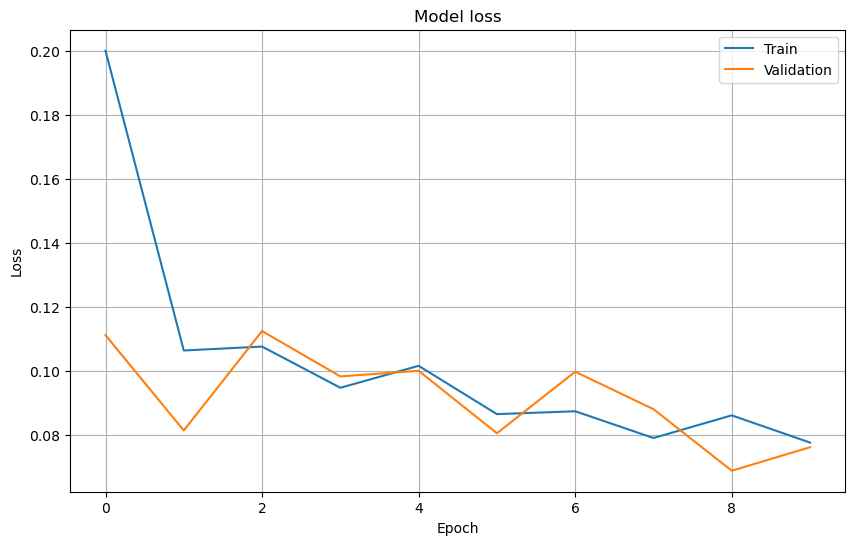

In [45]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2, class_weight=class_weight_train, callbacks=[progbar_logger])

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()


In [46]:
class_weight_train

{0: 0.5162537374375996, 1: 15.88107779578606}

In [47]:
lstm_predictions = model.predict(X_test)

 20/613 [..............................] - ETA: 1s  

2023-06-14 14:42:05.587670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-06-14 14:42:05.641004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


613/613 [==============================] - 2s 3ms/step


In [48]:
lstm_predictions

array([[0.00130454],
       [0.00916759],
       [0.44838524],
       ...,
       [0.9964104 ],
       [0.06229807],
       [0.00307206]], dtype=float32)

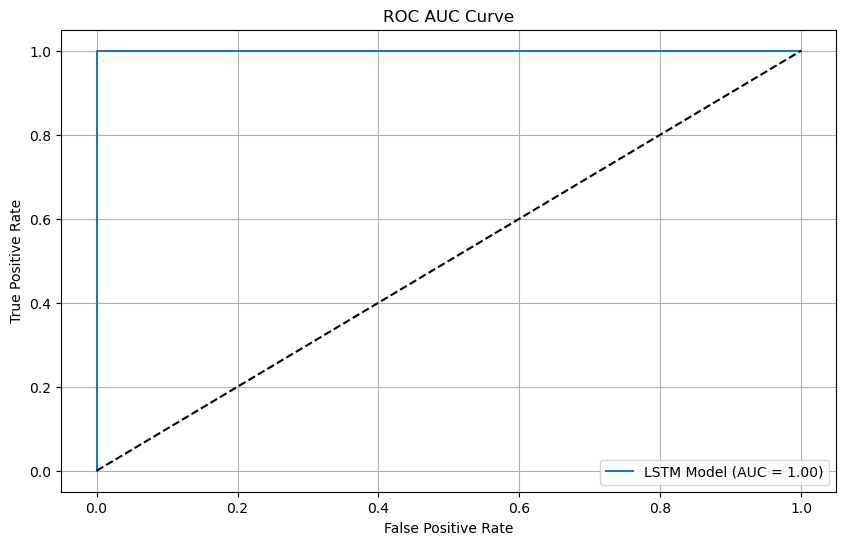

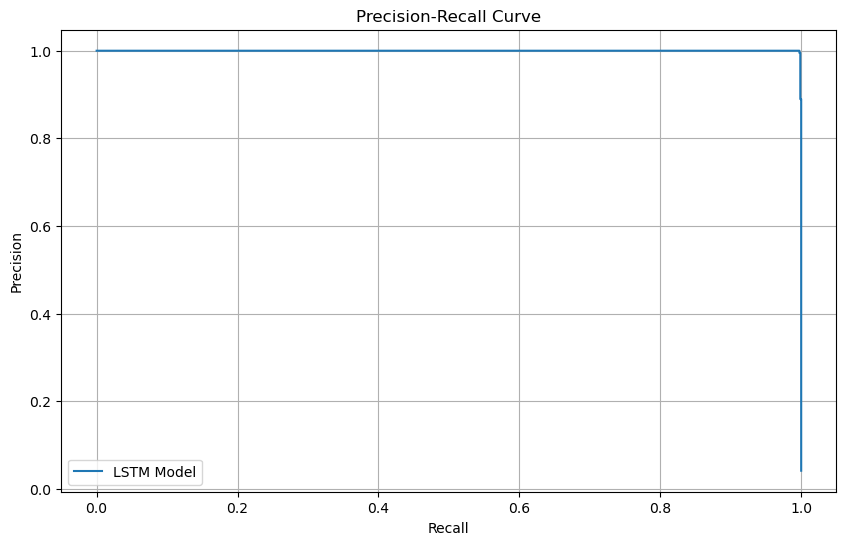

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

y_true = y_test.flatten() 
y_pred = lstm_predictions.flatten() 

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_true, y_pred)

# Calculate Precision and Recall scores
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot ROC AUC curve
plt.figure(figsize=(10, 6))
plt.plot(*roc_curve(y_true, y_pred)[:2], label='LSTM Model (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='LSTM Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


In [50]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# classes
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))


print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))


roc_auc_minority = roc_auc_score(y_test == 1, y_pred)
print("\nROC AUC for minority class:", roc_auc_minority)


613/613 [==============================] - 2s 3ms/step
Confusion Matrix:
 [[18184   605]
 [    0   806]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     18789
         1.0       0.57      1.00      0.73       806

    accuracy                           0.97     19595
   macro avg       0.79      0.98      0.86     19595
weighted avg       0.98      0.97      0.97     19595


ROC AUC for minority class: 0.9999931325638372


This makes no sense to me, basically we cannot predict any in conflict right now.